In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create dataframe from local csv file
stroke_data =pd.read_csv('../Data/train_2v.csv')

# We will start by preview our data and determing what kind of problem we have. 

In [3]:
# Preview dataframe
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
# Get shape of dataframe
stroke_data.shape

(43400, 12)

In [5]:
# Get the number of indiviudals who had a stroke.
number_of_people_who_had_a_stroke = len(stroke_data[stroke_data["stroke"] == 1])
number_of_people_who_had_a_stroke

783

In [6]:
# Get the percentage of people who had a stroke
percentage_of_people_who_had_a_stroke = (number_of_people_who_had_a_stroke / len(stroke_data) ) * 100
percentage_of_people_who_had_a_stroke

1.804147465437788

 # After previewing our data, we see that we have a classification problem.  We will determine what the most appropriate features are, and use these to predict whether an individual will have a stroke.
 
 # We also notice that only about 1.8% of the individuals in our dataset had a stroke.  We will have to find a way to deal with imbalanced data.

# 1. Prework / Data Cleansing

In [7]:
# We do not want to work with unique identifiers.
# We will therefore drop the id column.

del stroke_data["id"]
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [8]:
# Check for NaN values
stroke_data.isna().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [9]:
# Get number of unique values in smoking_status column
stroke_data["smoking_status"].nunique()

3

In [10]:
stroke_data.groupby("smoking_status").count()["stroke"]

smoking_status
formerly smoked     7493
never smoked       16053
smokes              6562
Name: stroke, dtype: int64

In [11]:
# Get number of unique values in bmi column
stroke_data["bmi"].nunique()

555

### We are working with NaN data.  We have a few options for what to do.

1. Fill NaN values in the "bmi" column mean/median/mode
2. Drop all NaN data
3. Assume any NaN value in the smoking_status column corresponds to "smokes," then to "never smoked,"and compare the results of the algorithms. 
4. Label encode the three categories

The second option could possibly help alleviate the imbalanaced data issue.

In [12]:
print(f"Mean: {stroke_data['bmi'].mean()},\n\
Median: {stroke_data['bmi'].mean()},\n\
Mode: {stroke_data.mode()['bmi'][0]}")

Mean: 28.605038390004545,
Median: 28.605038390004545,
Mode: 27.7


In [13]:
# Fill NaN values in the "bmi" column with the mean bmi.
stroke_data["bmi"].fillna(stroke_data["bmi"].mean(), inplace=True)
# stroke_data.dropna(how="any",inplace=True)

In [14]:
# Confirm no NaN values in the "bmi" column
stroke_data.isna().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [15]:
# Drop remaining NaN data
stroke_data.dropna(axis=0, inplace=True)

# Get shape of dataframe after dropping NaN values
stroke_data.shape

(30108, 11)

In [16]:
# Confirm no NaN values
stroke_data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
# Get the number of indiviudals who had a stroke after dropping NaN values in the smoking_status column.
number_of_people_who_had_a_stroke = len(stroke_data[stroke_data["stroke"] == 1])
number_of_people_who_had_a_stroke

638

In [18]:
# Get the percentage of people who had a stroke after dropping NaN values in the smoking_status column.
percentage_of_people_who_had_a_stroke = (number_of_people_who_had_a_stroke / len(stroke_data) ) * 100
percentage_of_people_who_had_a_stroke

2.1190381294008236

After dropping all rows with an NaN value in the smoking_status column, the percentage of individuals who had a stroke still only make up about 2.12% of the data.  Our data is still wildly imbalanced, so we do not believe simply dropping these rows will cause harm to our Machine Learning Model.

### We will now examine the categorical data in this dataset.

In [19]:
# Get the data type for each column
stroke_data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [20]:
# Get a count of how many values make up each category in the "gender" column
stroke_data.groupby("gender").count()["stroke"]

gender
Female    18366
Male      11733
Other         9
Name: stroke, dtype: int64

In [21]:
# Get the stroke status for individiuals in the "other" category of the "gender" column
stroke_data[stroke_data["gender"] == "Other"]["stroke"]

2914     0
10768    0
15620    0
19748    0
21041    0
21192    0
24252    0
26199    0
40768    0
Name: stroke, dtype: int64

In [22]:
percent_of_people_with_gender_other = (len(stroke_data[stroke_data["gender"] == "Other"]) / len(stroke_data)) * 100
percent_of_people_with_gender_other

0.02989238740534077

We have 9 indiviudals whose value for "gender" is "other."  Every one of these individuals have a value of 0 for "stroke."  We opt to drop these 9 values, as it could confuse the Machine Learning model into believing that a gender of "other" will cause a value of 0 for "stroke."  These 9 rows make up about 0.03% of the dataset.

In [23]:
# Get a count of how many values make up each category in the "ever_married" column
stroke_data.groupby("ever_married").count()["stroke"]

ever_married
No      7557
Yes    22551
Name: stroke, dtype: int64

In [24]:
# Get a count of how many values make up each category in the "work_type" column
stroke_data.groupby("work_type").count()["stroke"]

work_type
Govt_job          4346
Never_worked       101
Private          19585
Self-employed     5445
children           631
Name: stroke, dtype: int64

In [25]:
# Get a count of how many values make up each category in the "Residence_type" column
stroke_data.groupby("Residence_type").count()["stroke"]

Residence_type
Rural    14982
Urban    15126
Name: stroke, dtype: int64

In [26]:
# Get a count of how many values make up each category in the "smoking_status" column
stroke_data.groupby("smoking_status").count()["stroke"]

smoking_status
formerly smoked     7493
never smoked       16053
smokes              6562
Name: stroke, dtype: int64

## 2. Data Exploration

Text(0.5,1,'Stroke Count: 1 corresponds to "had a stroke"')

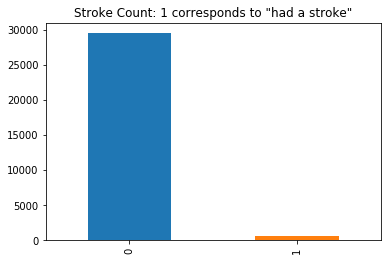

In [27]:
# Make bar plot to see count of how many people did and did not have a stroke
stroke_data.stroke.value_counts().plot(kind="bar")
plt.title("Stroke Count: 1 corresponds to \"had a stroke\"")

In [28]:
# Create list of possible categorical features
possible_categorical_features = ["gender",
                                 "hypertension",
                                 "heart_disease",
                                 "ever_married",
                                 "work_type",
                                 "Residence_type",
                                 "smoking_status"]

# Create list of possible numerical features
possible_numerical_features = ["age",
                               "avg_glucose_level",
                               "bmi"]

### Categorical Analysis

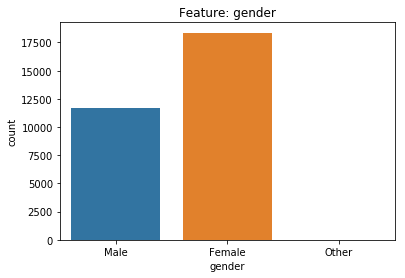

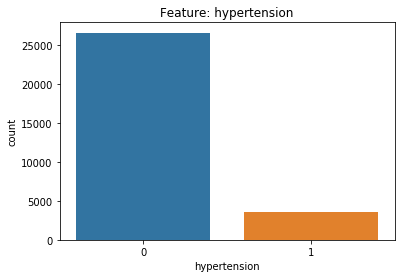

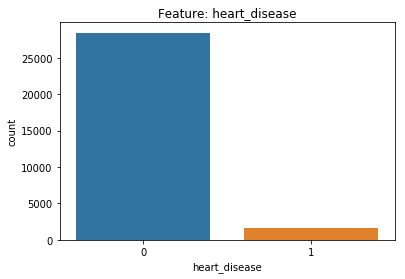

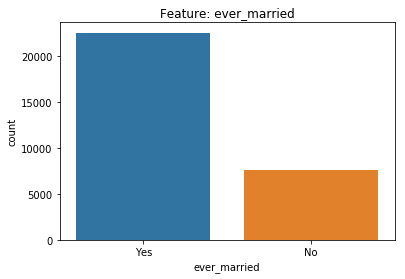

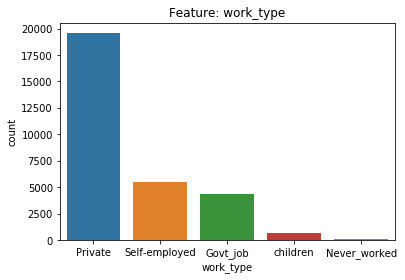

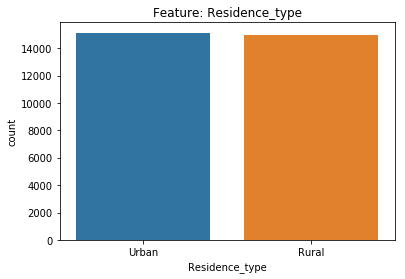

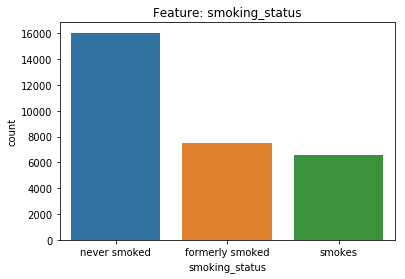

In [29]:
for possible_feature in possible_categorical_features:
    sns.countplot(possible_feature, data=stroke_data)
    plt.title(f"Feature: {possible_feature}")
    plt.show()

#### We already know that very few individuals are in the "had a stroke" category.  From the bar plots above, we also notice that

1. Very few individuals fall in the "has hypertension" category
2. Very few individuals fall in the "has heart disease" category
3. Relatively few individuals fall in the "not ever married" category

#### In addition to this, we notice that,
1. Individuals whose work type is "children", "government job," or "self-employed" make up varying degrees of small categories.
2. While there are fewer individuals in the "formerly smoked" and "smokes" categories than those in the "never smoked" category, the first two aforementioned categories are not as drastically small as the small categories already mentioned.
3. The "urban residence type" and "rural residence type" categories are approximately the same size.

### Numerical Analysis

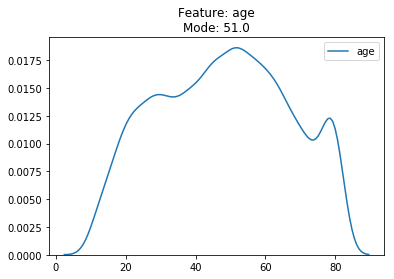

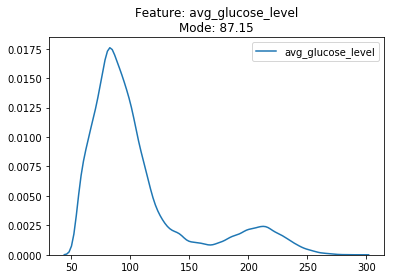

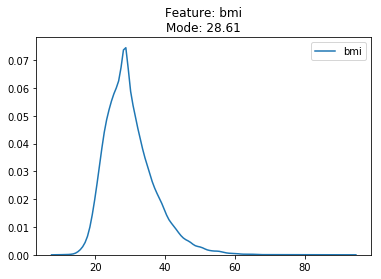

In [30]:
# Get kdeplot for each possible numerical feature
for possible_feature in possible_numerical_features:
    sns.kdeplot(stroke_data[possible_feature])
    plt.title(f"Feature: {possible_feature}\nMode: {round(stroke_data.mode()[possible_feature][0], 2)}")
    plt.show()

#### From the KDE plots above, we notice that,

1. Most samples appear to have an age in the 50s.
2. Most samples have an average glucose level (AVG) a little less than 100, perhaps around 80-90.  The frequency of AVGs drop sharply after this value, though there is a slight spike in frequency for individuals with an average glucose level just over 200.
3. Most samples have an average bmi somewhere around 30.

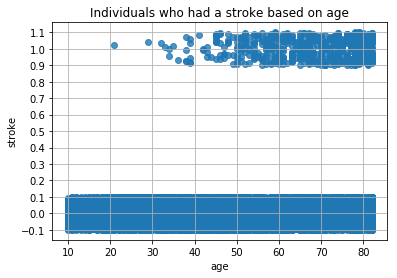

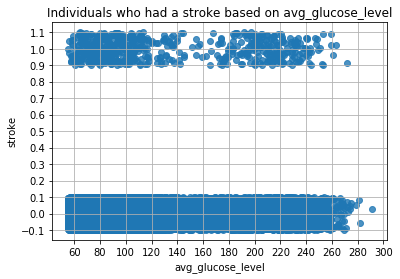

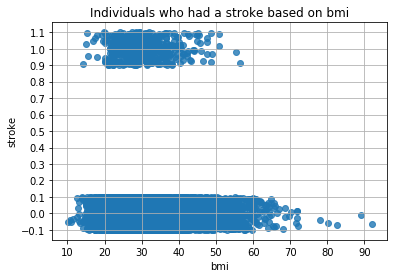

In [31]:
for possible_feature in possible_numerical_features:
    sns.regplot(x=possible_feature, y="stroke", data=stroke_data, fit_reg=False, y_jitter=0.1)
    plt.title(f"Individuals who had a stroke based on {possible_feature}")
    
    # Find the minimum and maximum values from the current column
    # in order to calculate the range
    # Divide this range by a small number to set a new step-size for the x-axis
    column_max = stroke_data[possible_feature].max()
    column_min = stroke_data[possible_feature].min()
    column_range = column_max - column_min
    
    # Divide the column range by 10 for the plot showing avg_glucose_level,
    # otherwise the step-size would be too low and the x-axis would be unreadable.
    # We still want to divide the range by 5 to find the step-size for the other graphs,
    # as more x-ticks help us to more clearly see where the data lies.
    if possible_feature == "avg_glucose_level":
        plt.locator_params(nbins=column_range/10)
    else: 
        plt.locator_params(nbins=column_range/5)
    
    plt.grid()
    plt.show()

#### From the regplots above, we notice that indivuals who did not have a stroke could be any age, and have any average glucose level (AVG) or BMI.  However,

1. Individuals who did have a stroke were heavily concentrated in the higher age-group.  Very few indivduals under the age of 40 had a stroke, and the "concentration" really starts breaking up below age 50.
2. Individuals who did have a stroke are heavily concentrated at an AVG of less than about 120, or an AVG of greater than about 180 .  There seems to be a gap where much fewer indivduals with an AVG between these two values had a stroke.
3. Individudals who did have a stroke are heavily concentrated between a BMI of about 20 and 40, with a decent but smaller amount of people having BMIs exceeding 40.  Very few individuals with a BMI less than 20 had a stroke.

## 3. Model Building

In [32]:
# Transform data to binary encoded data
stroke_data_binary_encoded = pd.get_dummies(stroke_data, columns=["gender", "ever_married", "work_type", "Residence_type", "smoking_status"])
stroke_data_binary_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1,58.0,1,0,87.96,39.2,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,70.0,0,0,69.04,35.9,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
6,52.0,0,0,77.59,17.7,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
7,75.0,0,1,243.53,27.0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
8,32.0,0,0,77.67,32.3,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [33]:
# Create our features and label
X = stroke_data_binary_encoded.drop(["stroke"], axis=1)
y = stroke_data_binary_encoded["stroke"].values.reshape(-1,1)

In [34]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler

# Create scale for features and label
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Scale features and labels
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\tyler\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tyler\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tyler\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
